In [1]:
!pip install yfinance


[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: pip install --upgrade pip


In [2]:
import pandas as pd
from pandas_datareader import data as web
import yfinance as yf

In [3]:
yf.pdr_override()

In [4]:
start = '2023-01-01'
end = '2023-12-20'

In [5]:
data = web.get_data_yahoo('NVDA', start=start, end=end)
data.head()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-01-03,148.509995,149.960007,140.960007,143.149994,143.086487,40127700
2023-01-04,145.669998,148.529999,142.410004,147.490005,147.424591,43132400
2023-01-05,144.910004,145.639999,141.479996,142.649994,142.586716,38916800
2023-01-06,144.740005,150.100006,140.339996,148.589996,148.524094,40504400
2023-01-09,152.839996,160.559998,151.410004,156.279999,156.210693,50423100


In [6]:
def rsi_func(df, days=14,lower=30,upper=70):
    chg = df['Close'].diff(1)
    
    gain = chg.mask(chg<0,0) #if chg < 0 then value = 0 
    loss = chg.mask(chg>0,0)  #if chg > 0 then value = 0 
    avg_gain = gain.rolling(days).mean()  #by default min_periods = window
    avg_loss = abs(loss.rolling(days).mean()) #by default min_periods = window
    rs = avg_gain/avg_loss
    rsi = 100 - (100/(1+rs))
    df['rsi'] = rsi
    
    
    #Find action zone

    df.loc[(df['rsi'] > upper), 'action'] = 'sell'
    df.loc[(df['rsi'] < lower), 'action'] = 'buy'
    df.loc[df['action'] == 'buy', 'marker_position'] = df['Low'] * 0.98
    df.loc[df['action'] == 'sell', 'marker_position'] = df['High'] * 1.02

    return df

In [7]:
rsi_starter = rsi_func(data, days=14)
rsi_starter[rsi_starter.action.notnull()].head()

,Open,High,Low,Close,Adj Close,Volume,rsi,action,marker_position
Date,,,,,,,,,
2023-01-03,148.509995,149.960007,140.960007,143.149994,143.086487,40127700,NaN,nan,NaN
2023-01-04,145.669998,148.529999,142.410004,147.490005,147.424591,43132400,NaN,nan,NaN
2023-01-05,144.910004,145.639999,141.479996,142.649994,142.586716,38916800,NaN,nan,NaN
2023-01-06,144.740005,150.100006,140.339996,148.589996,148.524094,40504400,NaN,nan,NaN
2023-01-09,152.839996,160.559998,151.410004,156.279999,156.210693,50423100,NaN,nan,NaN


In [8]:
!pip install mplfinance


[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: pip install --upgrade pip


In [9]:
import mplfinance as mpf

def rsi_plot(df_plot,lower=30,mid=50,upper=70):
    df = rsi_func(df_plot)
    
    df['lower'] = lower
    df['upper'] = upper
    df['mid'] = mid
    rsi_ylim = (0,100)


    # for plot rsi 
    mpf_rsi = mpf.make_addplot(df['rsi'], panel=1, color='blue', title='RSI', ylim=rsi_ylim)
    mpf_lower = mpf.make_addplot(df['lower'], panel = 1, color='orange', ylim=rsi_ylim)
    mpf_upper = mpf.make_addplot(df['upper'], panel = 1, color='orange', ylim=rsi_ylim)
    mpf_mid = mpf.make_addplot(df['mid'], panel = 1, color='gray', ylim=rsi_ylim)
    
    
    # for marker
    markers = ['^' if x == 'buy' else 'v' for x in df['action']]
    color_marker = ['green' if x == 'buy' else 'red' for x in df['action']]
    plot_signal = mpf.make_addplot(df['marker_position'], type='scatter', marker=markers, color=color_marker)
    plots = [mpf_rsi, mpf_lower, mpf_mid ,mpf_upper, plot_signal]
    
    return plots

In [10]:
rsi_to_plot = rsi_plot(data)

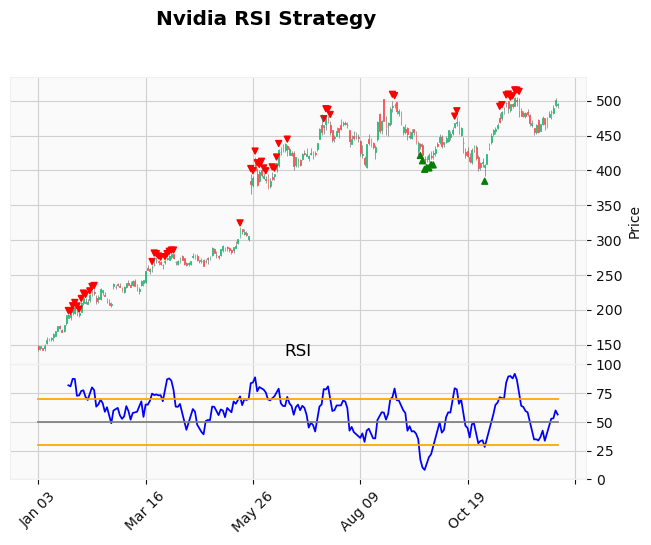

In [11]:
mpf.plot(data, type='candle', style='yahoo', addplot=rsi_to_plot, title='Nvidia RSI Strategy')

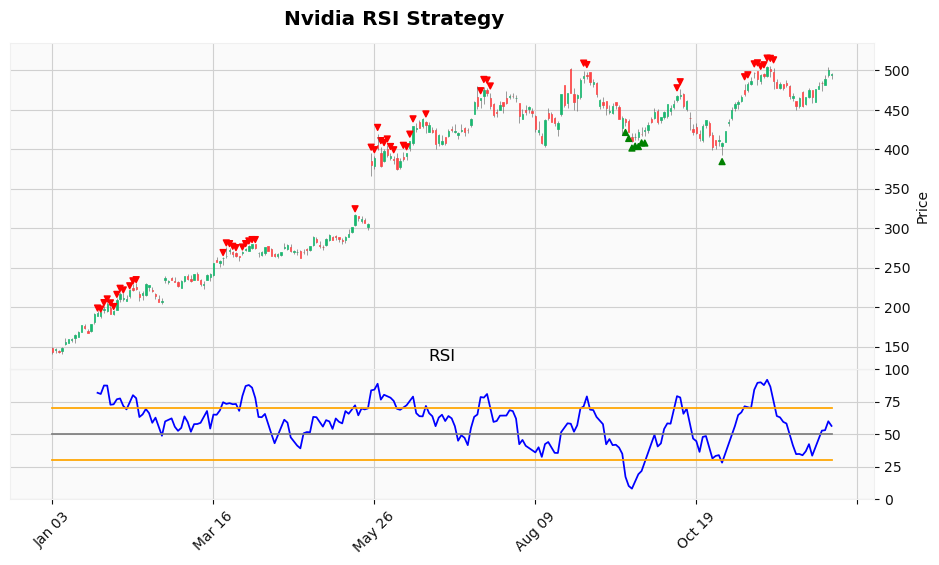

In [34]:
mpf.plot(data, 
         type='candle', 
         style='yahoo', 
         addplot=rsi_to_plot, 
         title='Nvidia RSI Strategy', 
         figsize = (12,6),
         scale_padding ={'top':0.5},
         tight_layout=False
        )